In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Loading and Preprocessing 

In [4]:
df = pd.read_csv("C:/Users/manue/Downloads/CarPrice_Assignment.csv")

In [5]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
df.drop(columns=['car_ID'], inplace=True)

In [10]:
df['CarCompany'] = df['CarName'].apply(lambda x: x.split()[0].lower())
df.drop(columns=['CarName'], inplace=True)

In [11]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [12]:
df_encoded.isnull().sum()

symboling                0
wheelbase                0
carlength                0
carwidth                 0
carheight                0
                        ..
CarCompany_toyouta       0
CarCompany_vokswagen     0
CarCompany_volkswagen    0
CarCompany_volvo         0
CarCompany_vw            0
Length: 70, dtype: int64

# 2. Model Implementation

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
models = {}

In [35]:
#1 Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
models['Linear Regression'] = {'model': lr, 'y_pred': y_pred_lr}

In [37]:
#2 Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
models['Decision Tree'] = {'model': dt, 'y_pred': y_pred_dt}

In [60]:
#3 random forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
models['Random Forest'] = {'model': rf, 'y_pred': y_pred_rf}

In [62]:
#4 gradient boosting regressor
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
models['Gradient Boosting'] = {'model': gb, 'y_pred': y_pred_gb}

In [64]:
# 5 SVR
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR()
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)
models['SVR'] = {'model': svr, 'y_pred': y_pred_svr}

# 3. Model Evaluation

In [66]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [68]:
results = []
for name, m in models.items():
    mse = mean_squared_error(y_test, m['y_pred'])
    mae = mean_absolute_error(y_test, m['y_pred'])
    r2 = r2_score(y_test, m['y_pred'])
    results.append({'Model': name, 'MSE': mse, 'MAE': mae, 'R2': r2})

In [70]:
results_df = pd.DataFrame(results)
print("Evaluation Metrics for All Models:")
print(results_df.sort_values(by="R2", ascending=False))

Evaluation Metrics for All Models:
               Model           MSE          MAE        R2
4      Random Forest  3.350118e+06  1296.539463  0.957563
2  Gradient Boosting  5.637845e+06  1686.942854  0.928584
0  Linear Regression  7.136800e+06  1820.619487  0.909597
1      Decision Tree  9.178813e+06  2070.187000  0.883730
3                SVR  8.689256e+07  5701.502460 -0.100686


#### Best Performer
Random Forest Regressor is the best performing model based on the evaluation metrics. Its high R² and low error values (MSE and MAE) demonstrate that it effectively captures the underlying relationships in the dataset, making it a reliable tool for predicting car prices. Its robust nature and the additional feature importance analysis make it highly useful for extracting actionable insights regarding the factors affecting car price predictions.

# 4. Feature Importance Analysis 

In [74]:
importances = rf.feature_importances_
features = X.columns

In [78]:
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [84]:
print("The Top 10 Important Features are:")
print(feature_importance_df.head(10))

The Top 10 Important Features are:
           Feature  Importance
6       enginesize    0.556220
5       curbweight    0.296141
13      highwaympg    0.044554
10      horsepower    0.024115
3         carwidth    0.013527
44  CarCompany_bmw    0.007628
2        carlength    0.007144
1        wheelbase    0.006839
12         citympg    0.006192
11         peakrpm    0.005904


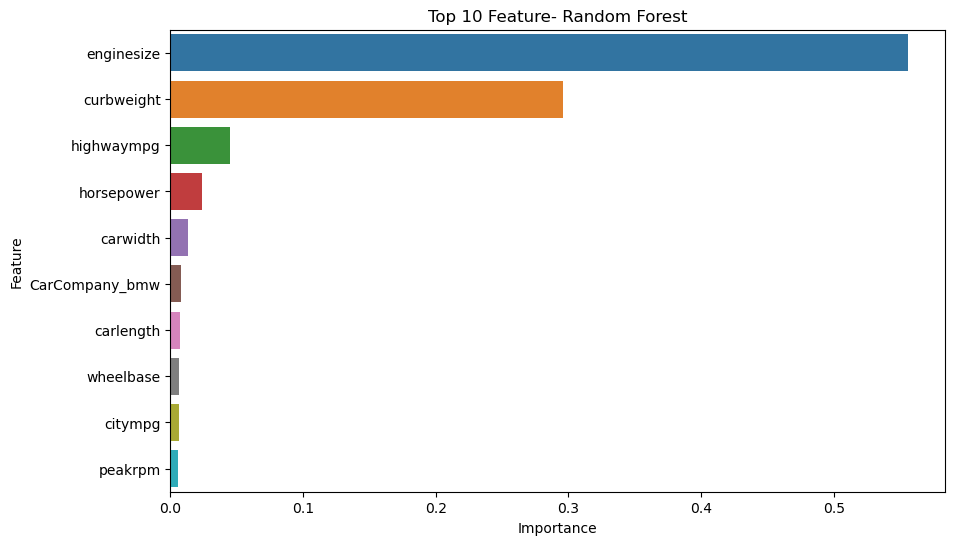

In [90]:
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Feature- Random Forest')
plt.show()

# 5. Hyperparameter Tuning

In [95]:
from sklearn.model_selection import GridSearchCV

In [97]:
param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20, 30],'min_samples_split': [2, 5, 10]}

In [105]:
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),param_grid=param_grid,cv=5, scoring='r2',n_jobs=-1,verbose=1)

In [107]:
grid_search.fit(X_train, y_train)
print("Best parameters from GridSearchCV:", grid_search.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters from GridSearchCV: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 150}


In [108]:
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

In [109]:
print("\nPerformance of Tuned Random Forest Regressor:")
print("MSE: ", mse_best_rf)
print("MAE: ", mae_best_rf)
print("R2: ", r2_best_rf)


Performance of Tuned Random Forest Regressor:
MSE:  3257603.0490366146
MAE:  1249.7165406955157
R2:  0.9587352783309263
